# Task1- Prediction using Supervised ML
In this  we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This task is a simple linear regression task as it involves just two variables.

Importing necessary libraries

In [22]:
#data
import pandas as pd
import numpy as np  

#visulization
import matplotlib.pyplot as plt  
%matplotlib inline

#ML Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Reading the data


In [23]:
url = "http://bit.ly/w-data"
sample_data = pd.read_csv(url)
print("Data imported successfully")

sample_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
sample_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


plot the graph to see the relationship bewteen the 2 variables using matplotlib.pyplot.

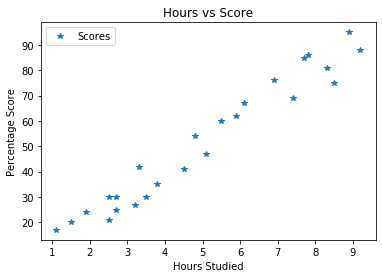

In [25]:
sample_data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph it is clear that there is positive linear relation between the two variables.

# Preparing the data and training the linear Regression Model

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = sample_data.iloc[:, :-1].values  
Y = sample_data.iloc[:, 1].values  
print("X",X)
print("Y",Y)

X [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Y [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.25, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [27]:
reg=LinearRegression()#Creating an object of Linear Regression
reg.fit(X_train,Y_train)#fitting the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

now, the model has been trained

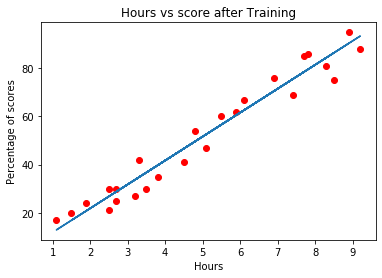

In [28]:
#plotting the regression line
line=reg.coef_*X+reg.intercept_ #Equation of line (y=mx+c)

#plot the test data
plt.scatter(X, Y,color='red')
plt.plot(X, line);
plt.xlabel("Hours")
plt.ylabel('Percentage of scores')
plt.title('Hours vs score after Training')
plt.show()

# Making Predictions

In [29]:
print(X_test) # Testing data - In Hours
Y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [31]:
hours=9.25
score=reg.coef_*hours+reg.intercept_
print("If a student studies for",hours,"hours per day they will have score of", score[0],"%")

If a student studies for 9.25 hours per day they will have score of 93.89272889341652 %


# Evaluting the model

In [32]:
#obtaning the final score in terms of mean absolute error
from sklearn import metrics  


In [33]:
 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.130879918502482
